#### **Install these in command prompt before execution**

In [6]:
!pip install pandas
!pip install numpy 
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn 
!pip install missingno

#### **Import and combine data**

In [7]:
import pandas as pd

# List of file paths for the 7 parts
file_paths = [f'dataset/uwb_dataset_part{i}.csv' for i in range(1, 8)]

# Load each part into a list of DataFrames
data_parts = [pd.read_csv(file_path, header=0) for file_path in file_paths]

In [8]:
# Combine all parts into a single DataFrame
combined_data = pd.concat(data_parts, ignore_index=True)

# Display the combined dataset
print(combined_data.head())
print(f"Combined dataset shape: {combined_data.shape}")

   NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0   0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1   0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2   1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3   1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4   0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   

   MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  \
0      967.0   611.0  ...    279.0    458.0    183.0    158.0    198.0   
1     1133.0   447.0  ...    144.0    334.0    290.0    228.0    187.0   
2      894.0   723.0  ...     32.0    373.0    224.0    174.0    124.0   
3     1127.0  1024.0  ...    252.0    173.0    198.0    160.0    434.0   
4     1744.0   276.0  ...    154.0    209.0    242.0    296.0     87.0   

   CIR1011  CIR1012  CIR1013  CIR1014  CIR1015  
0     87.0    296.0    505.0    307.0      0.0  
1    2

In [9]:
# Check the number of rows in each part
for i, part in enumerate(data_parts, start=1):
    print(f"Part {i} shape: {part.shape}")

# Check the combined dataset
print(f"Combined dataset shape: {combined_data.shape}")
print(combined_data.head())

Part 1 shape: (6000, 1031)
Part 2 shape: (6000, 1031)
Part 3 shape: (6000, 1031)
Part 4 shape: (6000, 1031)
Part 5 shape: (6000, 1031)
Part 6 shape: (6000, 1031)
Part 7 shape: (6000, 1031)
Combined dataset shape: (42000, 1031)
   NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0   0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1   0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2   1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3   1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4   0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   

   MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  \
0      967.0   611.0  ...    279.0    458.0    183.0    158.0    198.0   
1     1133.0   447.0  ...    144.0    334.0    290.0    228.0    187.0   
2      894.0   723.0  ...     32.0    373.0    224.0    174.0    124.0   
3     1127.0  1024.0  ... 

#### **Data Cleaning**

In [10]:
# Find columns with missing values
missing_values = combined_data.isnull().sum()
missing_cols = missing_values[missing_values > 0]
print("Columns with missing values:")
if not missing_cols.empty:
    print(missing_cols)
else:
    print("No missing values found.")

Columns with missing values:
No missing values found.


In [11]:
# duplicate rows count
duplicate_rows = combined_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# print duplicate rows if they exist
if duplicate_rows > 0:
    print("Sample duplicate rows:")
    print(combined_data[combined_data.duplicated()].head())

Number of duplicate rows: 0


In [12]:
# find columns with only 1 unique value
unique_counts = combined_data.nunique()
single_value_cols = unique_counts[unique_counts == 1]
print("Columns with only one unique value:")
if not single_value_cols.empty:
    print(single_value_cols)
else:
    print("No columns with a single unique value.")

Columns with only one unique value:
CH         1
BITRATE    1
PRFR       1
dtype: int64


In [13]:
# drop columns with only one unique value
unique_counts = combined_data.nunique()
cols_to_drop = unique_counts[unique_counts == 1].index
combined_data = combined_data.drop(columns=cols_to_drop)

- CH: only has **ONE** value which is '2'
- BITRATE: only has **ONE** value which is '110'
- PRFR: only has **ONE** value which is '64'

In [14]:
# check current combined dataset
print(f"Current Combined dataset shape: {combined_data.shape}")
print(combined_data.head())

Current Combined dataset shape: (42000, 1028)
   NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0   0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1   0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2   1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3   1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4   0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   

   MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  \
0      967.0   611.0  ...    279.0    458.0    183.0    158.0    198.0   
1     1133.0   447.0  ...    144.0    334.0    290.0    228.0    187.0   
2      894.0   723.0  ...     32.0    373.0    224.0    174.0    124.0   
3     1127.0  1024.0  ...    252.0    173.0    198.0    160.0    434.0   
4     1744.0   276.0  ...    154.0    209.0    242.0    296.0     87.0   

   CIR1011  CIR1012  CIR1013  CIR1014  CIR1015  
0     87.

In [15]:
# Identify non-numeric columns
non_numeric_cols = combined_data.select_dtypes(exclude=['number']).columns

# Print non-numeric columns
print("Non-numeric columns:")
print(non_numeric_cols.tolist())

Non-numeric columns:
[]


In [16]:
# Define special characters
special_chars = r"[!@#$%^&*()_\-?/<>]"

# Find columns with special characters
cols_with_special_chars = [col for col in combined_data.columns if combined_data[col].astype(str).str.contains(special_chars, regex=True).any()]

# Print columns with special characters
print("Columns containing special characters in values:")
print(cols_with_special_chars)

Columns containing special characters in values:
[]


#### **Turning FP values into meaningful value:**

In [17]:
#based on the user manual. The A value for the First Path Power Level would be 121.74 since the PRF is 64MHz

In [21]:
import numpy as np
import pandas as pd

#based on the user manual. The A value for the First Path Power Level would be 121.74 since the PRF is 64MHz
A = 121.74

# Calculate First Path Power Level
combined_data['FP_POWER'] = 10 * np.log10(
    (combined_data['FP_AMP1']**2 + combined_data['FP_AMP2']**2 + combined_data['FP_AMP3']**2) / (combined_data['RXPACC']**2)
) - A

# Display the new column
print(combined_data[['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'FP_POWER']].head())

   FP_AMP1  FP_AMP2  FP_AMP3  RXPACC    FP_POWER
0  18712.0  10250.0  11576.0   611.0  -89.758158
1  11239.0   6313.0   4712.0   447.0  -91.995986
2   4355.0   5240.0   3478.0   723.0 -101.249715
3   8502.0   8416.0   5890.0  1024.0  -99.446556
4  17845.0  18095.0  12058.0   276.0  -81.574943


In [22]:
print(combined_data)

       NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1       0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2       1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3       1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4       0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   0.0   2.43   745.0  12960.0  17703.0  14948.0         96.0   9987.0   
41996   0.0   1.39   745.0   2235.0  15089.0   8796.0         76.0  12559.0   
41997   1.0   5.48   747.0   7115.0   6262.0   4584.0         72.0   1435.0   
41998   1.0   3.40   745.0   6662.0   7683.0   5600.0         72.0   1491.0   
41999   0.0   2.43   747.0   2621.0  10276.0   6284.0         56.0   9116.0   

       MAX_NOISE  RXPACC  ...  CIR1007  CIR1008  CI

#### **PCA for feature reduction:**

In [23]:
# Drop the target column 'NLOS' first
pca_data = combined_data.drop(columns=["NLOS"]).copy()  # Remove NLOS and create a copy

# Step 1: Compute the mean (𝛍) for each column and center the data
mean_vals = pca_data.mean(axis=0)  # Compute mean for each feature
centered_data = pca_data - mean_vals  # Center the data by subtracting the mean

In [24]:
import numpy as np

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)  # Ensure correct shape

In [25]:
# Step 3: Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # More stable for symmetric matrices

In [26]:
# Step 4: Sort eigenvectors based on eigenvalues (descending order)
sorted_indices = np.argsort(eigenvalues)[::-1]  # Get indices of sorted eigenvalues
eigenvalues = eigenvalues[sorted_indices]  # Sort eigenvalues
eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly

In [27]:
# Step 5: Select the top k principal components for dimensionality reduction
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)  # Compute variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)  # Compute cumulative variance
k = np.argmax(cumulative_variance >= 0.95) + 1  # Select k PCs that retain 95% variance
top_k_eigenvectors = eigenvectors[:, :k]  # Extract top k eigenvectors

In [28]:
# Step 6: Project the data onto the selected principal components
pca_transformed_data = np.dot(centered_data, top_k_eigenvectors)  # New dataset with reduced dimensions

In [29]:
# Assign feature names to the principal components
# Get the feature names based on the highest absolute value of eigenvectors for each PC
original_feature_names = list(pca_data.columns)  # Save original feature names
pca_feature_names = [
    original_feature_names[np.argmax(np.abs(top_k_eigenvectors[:, i]))]
    for i in range(k)
]

In [30]:
# Convert transformed data into a DataFrame with original feature names as column labels
pca_df = pd.DataFrame(pca_transformed_data, columns=pca_feature_names)

In [31]:
# Display results
print(f"Original Data Shape: {pca_data.shape}")
print(f"Reduced Data Shape: {pca_df.shape}")
print(f"Explained Variance by {k} PCs: {cumulative_variance[k-1]:.4f}")

Original Data Shape: (42000, 1028)
Reduced Data Shape: (42000, 37)
Explained Variance by 37 PCs: 0.9507


In [32]:
# Columns left after feature reduction
print("Remaining Features After PCA:")
for col in pca_df.columns:
    print(col)

Remaining Features After PCA:
CIR_PWR
FP_AMP2
CIR746
CIR749
CIR753
CIR751
CIR752
CIR751
FP_AMP1
CIR753
CIR754
CIR755
CIR756
CIR757
CIR756
CIR757
CIR759
CIR760
CIR761
CIR748
CIR761
CIR762
CIR762
CIR763
FP_AMP3
CIR764
CIR765
CIR765
CIR743
CIR770
CIR769
CIR770
CIR771
CIR_PWR
CIR772
CIR776
CIR775


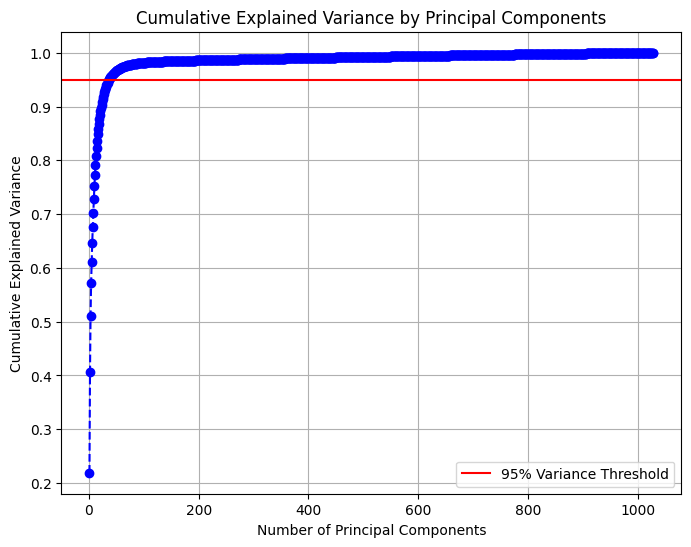

In [34]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label="95% Variance Threshold")
plt.legend(loc='lower right')
plt.show()

#### **Data after PCA**

In [35]:
# Check for duplicated columns
duplicated_columns = pca_df.columns[pca_df.columns.duplicated()].tolist()
# Drop duplicated columns
pca_df = pca_df.loc[:, ~pca_df.columns.duplicated()]

print(pca_df.shape)

(42000, 28)


In [37]:
print(pca_df)

            CIR_PWR       FP_AMP2        CIR746       CIR749       CIR753  \
0       3386.412623 -14010.813519  -6696.260201  2994.301807  5013.266853   
1     -25211.010006  15485.361481  -7584.880975 -7528.295269  9002.225440   
2     -11518.972150  15024.778787 -12090.139591   620.404436  4393.558295   
3      -6011.268342  14757.556638    -65.978017 -5330.612731  2077.107899   
4       3016.657486 -19785.767000   3611.323620  6632.573912  2564.295146   
...             ...           ...           ...          ...          ...   
41995   3742.636214 -11138.066766  -8241.037036 -4410.855349 -3198.165701   
41996   -828.584196 -10037.926614  -2605.689721  5165.701097 -2367.254144   
41997  15190.770535   8685.290344   8116.536811  3625.698202 -1371.985626   
41998  20250.390592   5630.955276   4833.947235 -4904.737382 -1541.110783   
41999  -2898.588906   1576.305060  10278.463627  6548.036861  5040.738224   

             CIR751       CIR752      FP_AMP1       CIR754       CIR755  ..

In [24]:
# Drop all columns except the ones left after PCA
pca_columns = pca_df.columns  # Get the PCA feature columns
combined_pca_data = combined_data[pca_columns]  # Retain only those columns in combined_data

# Join 'NLOS' column back to the reduced dataset
combined_pca_data['NLOS'] = combined_data['NLOS']

# Display the resulting DataFrame
print("Data after PCA and adding NLOS:")
print(combined_pca_data.head())

Data after PCA and adding NLOS:
   CIR_PWR  FP_AMP2   CIR746   CIR749   CIR753   CIR751   CIR752  FP_AMP1  \
0  11855.0  10250.0   6102.0   9621.0   6569.0   7763.0   2337.0  18712.0   
1  18968.0   6313.0    194.0   1840.0  17764.0  10885.0  17365.0  11239.0   
2  14699.0   5240.0   1212.0   4489.0  11277.0   7344.0   8902.0   4355.0   
3   8748.0   8416.0    292.0   1424.0  12037.0   5876.0   9544.0   8502.0   
4  11380.0  18095.0  11949.0  16162.0   7605.0   1543.0  10785.0  17845.0   

    CIR754   CIR755  ...  CIR764  CIR765  CIR743  CIR770  CIR769  CIR771  \
0   8875.0   6793.0  ...  4700.0  4515.0   814.0  1830.0  2288.0  1307.0   
1  12565.0  16559.0  ...  6046.0  2636.0   179.0   910.0  4080.0   997.0   
2  16809.0   9208.0  ...  9815.0  1207.0   114.0  3219.0  3850.0  1731.0   
3   8059.0   5579.0  ...  8974.0  4098.0   223.0  3798.0  3901.0  4361.0   
4   4289.0   2524.0  ...  1360.0   454.0    43.0   379.0  1113.0   689.0   

   CIR772  CIR776  CIR775  NLOS  
0   461.0   40

C:\Users\Li En\AppData\Local\Temp\ipykernel_13148\860712666.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_pca_data['NLOS'] = combined_data['NLOS']


#### **Further data cleaning/preparation**

In [28]:
from sklearn.preprocessing import StandardScaler

# Calculate the IQR (Interquartile Range) for each feature
Q1 = combined_pca_data.drop(columns=['NLOS']).quantile(0.25)
Q3 = combined_pca_data.drop(columns=['NLOS']).quantile(0.75)
IQR = Q3 - Q1

In [29]:
# Define the outlier condition: values that are outside of the IQR range
outlier_condition = ((combined_pca_data.drop(columns=['NLOS']) < (Q1 - 1.5 * IQR)) | 
                     (combined_pca_data.drop(columns=['NLOS']) > (Q3 + 1.5 * IQR)))

# Drop rows with any outliers
cleaned_combined_pca_data = combined_pca_data[~outlier_condition.any(axis=1)]

In [30]:
# Display the shape of the cleaned data
print(f"Original Data Shape: {combined_pca_data.shape}")
print(f"Cleaned Data Shape (after dropping outliers): {cleaned_combined_pca_data.shape}")

Original Data Shape: (42000, 29)
Cleaned Data Shape (after dropping outliers): (25155, 29)


#### **jf's PCA portion**

In [ ]:
from pandas.api.types import is_numeric_dtype

for col in combined_data.columns:
    if is_numeric_dtype(combined_data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % combined_data[col].mean())
        print('\t Standard deviation = %.2f' % combined_data[col].std())
        print('\t Minimum = %.2f' % combined_data[col].min())
        print('\t Maximum = %.2f' % combined_data[col].max())    

In [ ]:
print(combined_data.head())

In [ ]:
print('Covariance:')
combined_data.cov(numeric_only=True)

In [ ]:
print('Correlation:') 
combined_data.corr(numeric_only=True) #range -1 to +1

In [ ]:
combined_data.describe()

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of NLOS and LOS
nlos_count = combined_data['NLOS'].value_counts()[1]
los_count = combined_data['NLOS'].value_counts()[0]

# Print the counts
print(f'NLOS count: {nlos_count}')
print(f'LOS count: {los_count}')

# Plot the distribution of the target variable (NLOS)
plt.figure(figsize=(6, 4))
combined_data['NLOS'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of NLOS (0 = LOS, 1 = NLOS)')
plt.xlabel('NLOS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Define all numerical features
numerical_features = [
    'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
    'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 
    'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'
]

# Set up the plot
plt.figure(figsize=(18, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(combined_data[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = combined_data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Plot boxplots for numerical features
# Set up the plot
plt.figure(figsize=(18, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=combined_data[feature], color='orange')
    plt.title(f'Boxplot of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Plot CIR values for a few samples
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot first 5 samples
    plt.plot(combined_data.loc[i, 'CIR1':'CIR1015'], label=f'Sample {i+1}')
plt.title('CIR Values for First 5 Samples')
plt.xlabel('CIR Index')
plt.ylabel('CIR Value')
plt.legend()
plt.show()

In [ ]:
# Check for missing values in each column
missing_data = combined_data.isnull().sum()

# Display columns with missing values
if missing_data.sum() > 0:
    print("Missing Data:")
    print(missing_data[missing_data > 0])
else:
    print("No missing data.")

In [ ]:
# Check for duplicate rows
duplicate_rows = combined_data.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Display duplicate rows
print("Duplicate Data:")
print(combined_data[duplicate_rows])

In [ ]:
# Calculate the variance of each column
variances = combined_data.var()

# Identify columns with zero or very low variance
low_variance_columns = variances[variances < 1e-10].index.tolist()

print("Columns with low variance:")
print(low_variance_columns)

In [ ]:
# Drop columns with low variance
data_cleaned = combined_data.drop(columns=low_variance_columns)

print(f"Shape after dropping low-variance columns: {data_cleaned.shape}")

In [ ]:
from scipy.stats import zscore
numerical_features = [
    'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
    'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 
    'FRAME_LEN', 'PREAM_LEN'
]

z_scores = data_cleaned[numerical_features].apply(zscore)

# Identify outliers (absolute Z-score > 3)
outliers = (abs(z_scores) > 3).any(axis=1)

# Display rows with outliers
print(data_cleaned[outliers])

In [ ]:
# Remove rows with outliers
data_cleaned = data_cleaned[~outliers]
print(data_cleaned.shape)

In [ ]:
# Drop the class attribute (NLOS)
data_without_class = combined_data.drop(columns=['NLOS'])

# Display the dataset without the class attribute
print(data_without_class.head())

In [ ]:
import matplotlib.pyplot as plt

# Select non-CIR numerical columns for visualization
non_cir_columns = ['RANGE', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']

# Plot boxplots for non-CIR numerical columns
plt.figure(figsize=(14, 8))
data_without_class[non_cir_columns].boxplot()
plt.title('Boxplot of Non-CIR Numerical Attributes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the variance of each column
variances = data_without_class.var()

# Identify columns with zero or very low variance
low_variance_columns = variances[variances < 1e-10].index.tolist()

print("Columns with low variance:")
print(low_variance_columns)

In [ ]:
# Drop columns with low variance
data_without_class = data_without_class.drop(columns=low_variance_columns)

print(f"Shape after dropping low-variance columns: {data_without_class.shape}")

In [ ]:
# 1. Convert data to numeric
data_numeric = data_without_class.select_dtypes(include=['number'])

# 2. Calculate Z-scores
Z = (data_numeric - data_numeric.mean()) / data_numeric.std()

In [ ]:
# 3. Identify and remove outliers
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

# Remove rows with any Z-score outside the range [-3, 3]
Z2 = Z.loc[((Z > -3).sum(axis=1) == Z.shape[1]) & ((Z <= 3).sum(axis=1) == Z.shape[1]), :]

print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

In [ ]:
data_cleaned = data_without_class.loc[Z2.index]
# Display the cleaned dataset
print("Cleaned dataset:")
print(data_cleaned)

In [ ]:

import pandas as pd
# Aggregate CIR columns (CIR1 to CIR1015)
# Ensure we are working with a copy of the DataFrame
data_cleaned = data_cleaned.copy()

# 1. Aggregation
# Aggregate CIR columns (CIR1 to CIR1015)
cir_columns = [f'CIR{i}' for i in range(1, 1016)]
data_cleaned.loc[:, 'CIR_MEAN'] = data_cleaned[cir_columns].mean(axis=1)
data_cleaned.loc[:, 'CIR_STD'] = data_cleaned[cir_columns].std(axis=1)
data_cleaned.loc[:, 'CIR_MAX'] = data_cleaned[cir_columns].max(axis=1)
data_cleaned.loc[:, 'CIR_MIN'] = data_cleaned[cir_columns].min(axis=1)

# Drop the original CIR columns (optional)
#data_cleaned = data_cleaned.drop(columns=cir_columns)

In [ ]:
# 2. Sampling
# Randomly sample 10% of the dataset
sampled_data = data_cleaned.sample(frac=0.1, random_state=42)
print(f"Shape of sampled dataset: {sampled_data.shape}")

In [ ]:
import pandas as pd
# 3. Discretization
# Discretize the RANGE feature into 5 bins
data_cleaned.loc[:, 'RANGE_BIN'] = pd.cut(data_cleaned['RANGE'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# Discretize the CIR_PWR feature into quartiles
data_cleaned.loc[:, 'CIR_PWR_BIN'] = pd.qcut(data_cleaned['CIR_PWR'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Display the final dataset
print(data_cleaned.head())

In [ ]:
data_cleaned.head()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract CIR columns (CIR1 to CIR1015)
cir_columns = [f'CIR{i}' for i in range(1, 1016)]
cir_data = data[cir_columns]

# Apply PCA
pca = PCA()
pca.fit(cir_data)

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Choose the number of components that explain >95% of the variance
n_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() <= 0.95])
print(f"Number of components to retain: {n_components}")

# Apply PCA with selected number of components
pca = PCA(n_components=n_components)
cir_reduced = pca.fit_transform(cir_data)

# Add reduced CIR features back to the dataset
for i in range(n_components):
    data[f'CIR_PC{i+1}'] = cir_reduced[:, i]

# Drop original CIR columns (optional, to save memory)
data.drop(columns=cir_columns, inplace=True)